# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [272]:
#Import all the necessary modules
%matplotlib inline
import numpy as np # for array operations
import pandas as pd # for data scraping and handling data in form of dataframe 
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for prettier plots

Tury: Added a markdown below all code that needs explanation and started comments with "Tury" for easier accessibility.

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [273]:
pima_df = pd.read_csv("pima-indians-diabetes.data",names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

Tury: Defined the column headers by passing array list in names argument of read_csv() since the data file didnot have it. 

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [274]:
pima_df.sample(10)
# printing 10 samples form the dataset using sample function

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
346,1,139,46,19,83,28.7,0.654,22,0
195,5,158,84,41,210,39.4,0.395,29,1
263,3,142,80,15,0,32.4,0.200,63,0
121,6,111,64,39,0,34.2,0.260,24,0
28,13,145,82,19,110,22.2,0.245,57,0
655,2,155,52,27,540,38.7,0.240,25,1
475,0,137,84,27,0,27.3,0.231,59,0
585,1,93,56,11,0,22.5,0.417,22,0
253,0,86,68,32,0,35.8,0.238,25,0
199,4,148,60,27,318,30.9,0.150,29,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [275]:
pima_df.info()
# viewing the data types of each column and shape of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [276]:
pima_df.isin([0]).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

Tury: Used isin() on the dataframe to verify if individual columns contain the value 0 with the help of any().

In [277]:
pima_df.median()
# Checking the median before replacing the erroneous 0 values.

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [278]:
for a in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    if pima_df[a].isin([0]).any() == True:
        pima_df[a] = pima_df[a].replace(0,pima_df[pima_df[a] != 0][a].median())
    else:
        pass

Tury: Replacing the 0 values in each of the selected columns by median of the column considering non-zero values only.

In [279]:
pima_df.median()
# Checking the median after replacing the erroneous 0 values.

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Tury: Changing value of median shows that the code has worked correctly.

# Q5 Print the descriptive statistics of each & every column using describe() function

In [280]:
pima_df.describe()
# Used describe function to show the stats info for all numerical columns.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

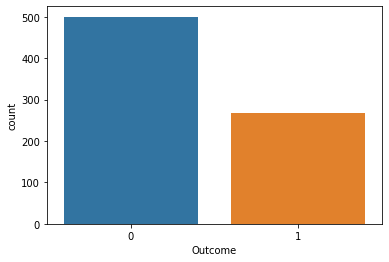

In [281]:
sns.countplot(x='Outcome',data=pima_df)
# Used countplot since Outcome/Class is categorical data.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

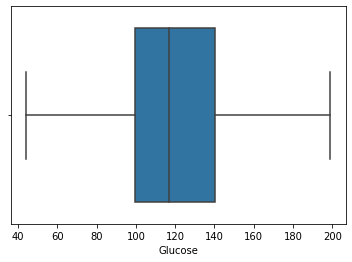

In [282]:
sns.boxplot(data=pima_df,x='Glucose')

Tury: Looking at this boxplot, we understand that Glucose variable follows almost normal dustribution.

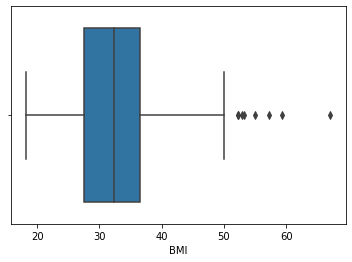

In [283]:
sns.boxplot(data=pima_df,x='BMI')

Tury: Looking at this boxplot, we understand that BMI variable is a highly right-skewed distribution with multiple outliers. 

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\TuryansuSubhadarshy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\TuryansuSubhadarshy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


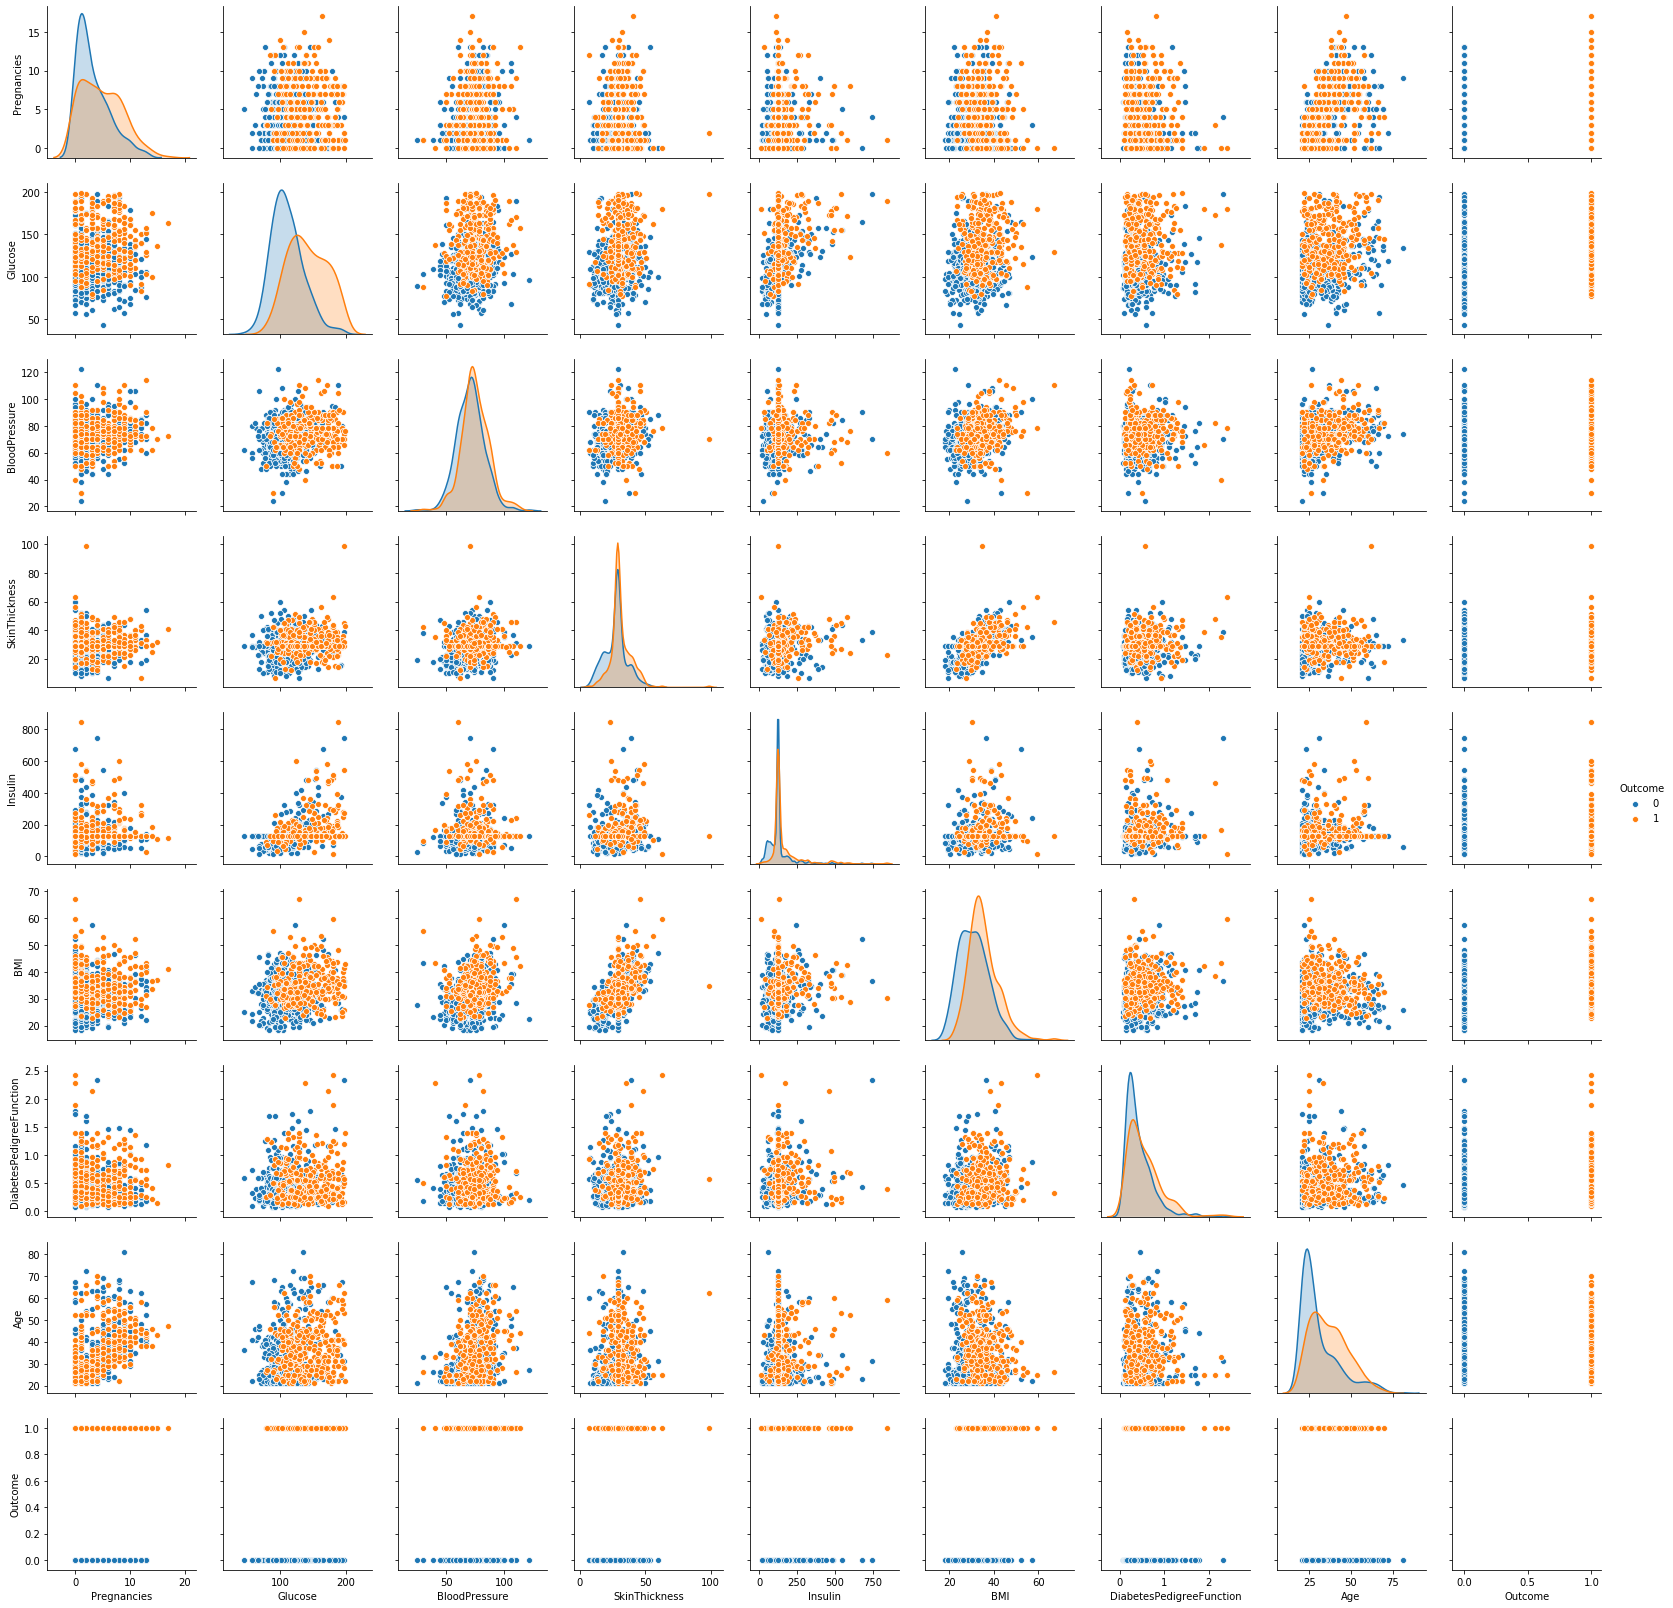

In [284]:
sns.pairplot(pima_df,diag_kind='kde',hue='Outcome')
# Using a pairplot for analysis of distribution of data in a variable and relationship with other variales.

Tury: since this is a classification problem, we take a look at the diagonals first.
It is pretty evevident that none of the features are perfect in splitting the data into our target classes (see hue).
Only 'Glucose' and 'BMI' have distributions which can be used for separating the classes, that too only in a given small range.
Higher Glucose levels can be a good classifier for the Diabetic cases, as seen by the scatter plots.
All the scatter plots have scattered data points, giving no meaningful insights or relationships between the features.
We can only say that 'SkinThickness' and 'BMI' have a postive correlation because of the funnel shaped scatter plot we see at an approximate 45 degrees ang;e to both the axes. 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [285]:
X = pima_df.drop('Outcome',axis=1)
y = pima_df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Tury: Defined the features of this data set with independent variables in X and dependent variable in y. Used train_test_split() after that to split the data into 70:30 ratio of training and test data.

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [286]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Tury: Imported the DecisionTreeClassifier from sklearn and defined dt_model with the classifier having criteria as entropy. Used .fit() to fit the Decision Tree model to training data with method of reducing entropy.

In [287]:
from sklearn import tree
pima_Tree = open('pima_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=pima_Tree, feature_names = list(X_train), class_names = list(['0','1']))
pima_Tree.close()

Tury: Generated a dot file to store the Decision Tree.

In [288]:
from IPython.display import HTML
HTML(filename='pima_Tree.html')

Tury: Generated a HTML view of the Decision Tree using code from the dot file in WebGraphviz. Saved the HTML file and displayed it above. PLease download the HTML file for this to work.

# Q10 Print the accuracy of the model & print the confusion matrix 

In [289]:
y_predict = dt_model.predict(X_test)
# Used .predict to use the Decision Tree model to predict the 'Outcome' for test data records.

In [290]:
print("Training accuracy score of this Decision Tree model is",dt_model.score(X_train, y_train))
print("Testing accuracy score of this Decision Tree model is",dt_model.score(X_test, y_test))

Training accuracy score of this Decision Tree model is 1.0
Testing accuracy score of this Decision Tree model is 0.7359307359307359


In [291]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix for this Decision Tree model is:\n",confusion_matrix(y_test,y_predict))

The confusion matrix for this Decision Tree model is:
 [[122  35]
 [ 26  48]]


Print the feature importance of the decision model - Optional

In [292]:
print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],index=X_train.columns))

                               Imp
Pregnancies               0.078807
Glucose                   0.297131
BloodPressure             0.054404
SkinThickness             0.081268
Insulin                   0.045167
BMI                       0.183118
DiabetesPedigreeFunction  0.124451
Age                       0.135653


Tury: Printed the feature importance of each feature in the model.

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

,Scores,n_estimators
0,0.770563,50
1,0.783550,100
2,0.766234,150
3,0.766234,200
4,0.761905,250
5,0.770563,300
6,0.770563,350
7,0.770563,400
8,0.774892,450


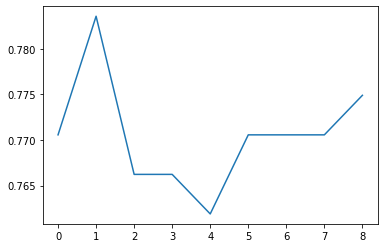

In [293]:
from sklearn.ensemble import RandomForestClassifier
Test_reg_scores = []
n_estimators = []
for i in range(50,500,50):
    rf_model = RandomForestClassifier(n_estimators = i, random_state=0)
    rf_model = rf_model.fit(X_train,y_train)
    y_pred_rf = rf_model.predict(X_test)
    scores = rf_model.score(X_test,y_test)
    Test_reg_scores.append(scores)
    n_estimators.append(i)
            
plt.plot(Test_reg_scores)

pd.concat([pd.DataFrame(Test_reg_scores, columns = ['Scores']),
           pd.DataFrame(n_estimators, columns = ['n_estimators'])], axis = 1)

Tury: Built a loop to find the Testing Accuracy for the Random Forest with the number of trees increasing from 100 till 1000 with a step of 50. The optimum value of Trees will be chosen on the basis of which has the highest accuracy.

Tury: As per the plot, we understand that 100 Trees give us a high accuracy from the numbers we have tried. So, we build the final Random Forest model with 100 Trees and print the accuracy below.

In [294]:
rf_model2 = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model2 = rf_model2.fit(X_train,y_train)
y_pred_rf2 = rf_model2.predict(X_test)
print("The Training Accuracy of this Random Forest model is:",rf_model2.score(X_train,y_train))
print("The Testing Accuracy of this Random Forest model is:",rf_model2.score(X_test,y_test))

The Training Accuracy of this Random Forest model is: 1.0
The Testing Accuracy of this Random Forest model is: 0.7835497835497836


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [295]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(base_estimator=dt_model,n_estimators=40)
ab_model = ab_model.fit(X_train,y_train)

Tury: Used previously defined Decison Tree as our base estimator and ensembled it for 40 trees/iterations.

In [296]:
print("Training accuracy score of this Decision Tree based Adaboost Ensemble is",ab_model.score(X_train, y_train))
print("Testing accuracy score of this Decision Tree based Adaboost Ensemble is",ab_model.score(X_test, y_test))

Training accuracy score of this Decision Tree based Adaboost Ensemble is 1.0
Testing accuracy score of this Decision Tree based Adaboost Ensemble is 0.7489177489177489


In [297]:
y_pred_ab = ab_model.predict(X_test)
# # Used .predict to use the Decision Tree based Adaboost Ensemble model to predict the 'Outcome' for test data records.
from sklearn.metrics import confusion_matrix
print("The confusion matrix for this Decision Tree based Adaboost Ensemble model is:\n",confusion_matrix(y_test,y_pred_ab))

The confusion matrix for this Decision Tree based Adaboost Ensemble model is:
 [[125  32]
 [ 26  48]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [298]:
from sklearn.ensemble import BaggingClassifier
bg_model = BaggingClassifier(base_estimator=dt_model,n_estimators=100)
bg_model = bg_model.fit(X_train,y_train)

Tury: Used previously defined Decison Tree as our base estimator and ensembled it for 100 trees/iterations.

In [299]:
print("Training accuracy score of this Decision Tree based Bagging Ensemble is",bg_model.score(X_train,y_train))
print("Testing accuracy score of this Decision Tree based Bagging Ensemble is",bg_model.score(X_test,y_test))

Training accuracy score of this Decision Tree based Bagging Ensemble is 1.0
Testing accuracy score of this Decision Tree based Bagging Ensemble is 0.8008658008658008


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.01,random_state=0)
gb_model = gb_model.fit(X_train,y_train)

Tury: Used GradientBoost for 50 iterations with learning rate/gradient step = 0.01.

In [303]:
print("Training accuracy score of this GradientBoost Ensemble is",gb_model.score(X_train,y_train))
print("Testing accuracy score of this GradientBoost Ensemble is",gb_model.score(X_test,y_test))

Training accuracy score of this GradientBoost Ensemble is 0.7411545623836127
Testing accuracy score of this GradientBoost Ensemble is 0.7359307359307359


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.